<a href="https://colab.research.google.com/github/marcosamanciopapa/TelecomX-parte2/blob/main/Challenge_Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Challenge Telecom X: análise de evasão de clientes - parte 2


##Dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/meu_arquivo.csv')

In [3]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Daily,account.Charges.Monthly,account.Charges.Total
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,2.186667,65.6,593.30
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,1.996667,59.9,542.40
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,2.463333,73.9,280.85
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,3.266667,98.0,1237.85
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,2.796667,83.9,267.40


##Removendo colunas irrelevantes à análise

In [4]:
colunas_remover = [
    'account.Charges.Daily',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'phone.MultipleLines',
    'customer.gender'
]

df = df.drop(columns=colunas_remover)

In [5]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')


In [6]:
df.head()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,no,0,yes,yes,9,yes,dsl,no,yes,no,yes,one year,yes,mailed check,65.6,593.30
1,no,0,no,no,9,yes,dsl,no,no,no,no,month-to-month,no,mailed check,59.9,542.40
2,yes,0,no,no,4,yes,fiber optic,no,no,yes,no,month-to-month,yes,electronic check,73.9,280.85
3,yes,1,yes,no,13,yes,fiber optic,no,yes,yes,no,month-to-month,yes,electronic check,98.0,1237.85
4,yes,1,yes,no,3,yes,fiber optic,no,no,no,yes,month-to-month,yes,mailed check,83.9,267.40


##Transformando variáveis categóricas em formato numérico

In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [8]:
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_yes,customer.Partner_yes,customer.Dependents_yes,phone.PhoneService_yes,internet.InternetService_fiber optic,internet.InternetService_no,...,internet.DeviceProtection_no internet service,internet.DeviceProtection_yes,internet.TechSupport_no internet service,internet.TechSupport_yes,account.Contract_one year,account.Contract_two year,account.PaperlessBilling_yes,account.PaymentMethod_credit card (automatic),account.PaymentMethod_electronic check,account.PaymentMethod_mailed check
0,0,9,65.6,593.30,False,True,True,True,False,False,...,False,False,False,True,True,False,True,False,False,True
1,0,9,59.9,542.40,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,4,73.9,280.85,True,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
4,1,3,83.9,267.40,True,True,False,True,True,False,...,False,False,False,True,False,False,True,False,False,True


In [9]:
df_encoded.to_csv('clientes_codificados.csv', index=False)

In [10]:
df = df_encoded

##Verificação da proporção de evasão

In [11]:
contagem = df['Churn_yes'].value_counts()
print(contagem)

Churn_yes
False    5398
True     1869
Name: count, dtype: int64


In [12]:
proporcoes = df['Churn_yes'].value_counts(normalize=True)
print(proporcoes)

Churn_yes
False    0.74281
True     0.25719
Name: proportion, dtype: float64


##Balanceamento de classes

In [13]:
!pip install -U imbalanced-learn

In [14]:
X = df.drop(columns='Churn_yes')
y = df['Churn_yes']


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [16]:
print(pd.Series(y_res).value_counts())


Churn_yes
False    5398
True     5398
Name: count, dtype: int64


#Normalização ou padronização dos dados

In [17]:
from sklearn.preprocessing import StandardScaler

colunas_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

scaler = StandardScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

In [18]:
df[colunas_numericas]

,customer.tenure,account.Charges.Monthly,account.Charges.Total
0,-0.950200,0.029206,-0.742291
1,-0.950200,-0.159990,-0.764729
2,-1.153700,0.304702,-0.880026
3,-0.787401,1.104635,-0.458160
4,-1.194400,0.636624,-0.885955
...,...,...,...
7262,-0.787401,-0.317653,-0.676344
7263,-0.421101,0.676455,-0.177864
7264,-1.235100,-0.478636,-0.962944
7265,1.410394,0.103889,1.036137


##Correlação e seleção de variáveis

##Análise de correlação

In [27]:
num_df = df.select_dtypes(include=['float64', 'int64'])

if 'Churn_yes' not in num_df.columns:
    num_df['Churn_yes'] = df['Churn_yes']

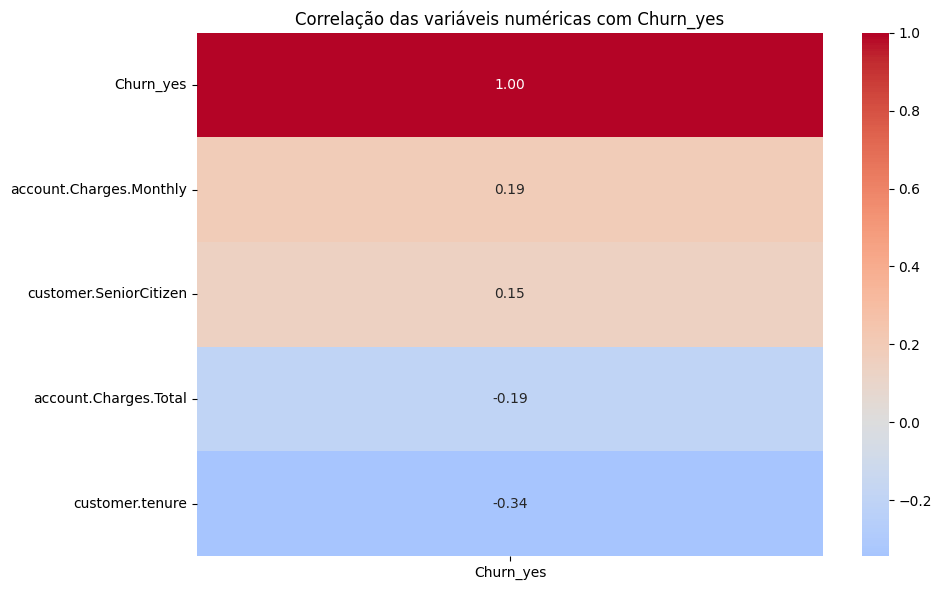

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona apenas colunas numéricas
num_df = df.select_dtypes(include=['float64', 'int64'])

# Garante que 'Churn_yes' está presente
if 'Churn_yes' not in num_df.columns:
    num_df['Churn_yes'] = df['Churn_yes']

# Calcula a matriz de correlação
corr_matrix = num_df.corr()

# Cria o heatmap focado em 'Churn_yes'
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['Churn_yes']].sort_values(by='Churn_yes', ascending=False),
            annot=True, cmap='coolwarm', center=0, fmt=".2f")

plt.title('Correlação das variáveis numéricas com Churn_yes')
plt.tight_layout()
plt.show()

##Análises direcionadas

###Tempo de contrato x Evasão

<Figure size 800x500 with 0 Axes>

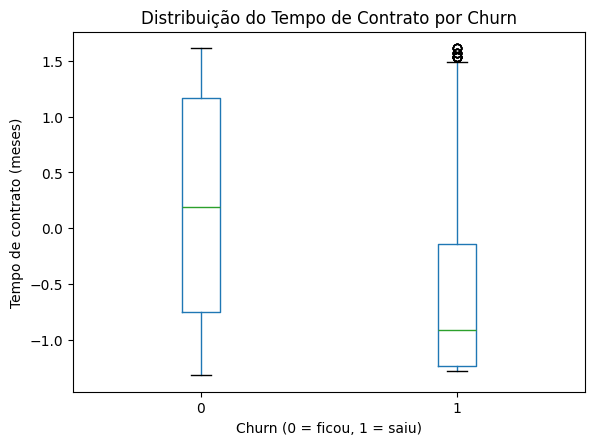

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column='customer.tenure', by='Churn_yes', grid=False)
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.suptitle('')
plt.xlabel('Churn (0 = ficou, 1 = saiu)')
plt.ylabel('Tempo de contrato (meses)')
plt.show()

###Total gasto x Evasão

<Figure size 800x500 with 0 Axes>

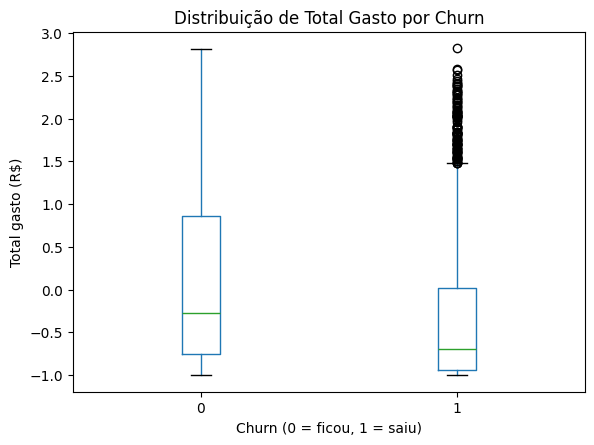

In [31]:
plt.figure(figsize=(8,5))
df.boxplot(column='account.Charges.Total', by='Churn_yes', grid=False)
plt.title('Distribuição de Total Gasto por Churn')
plt.suptitle('')
plt.xlabel('Churn (0 = ficou, 1 = saiu)')
plt.ylabel('Total gasto (R$)')
plt.show()

###Total gasto x Tempo de contrato com cor por Churn

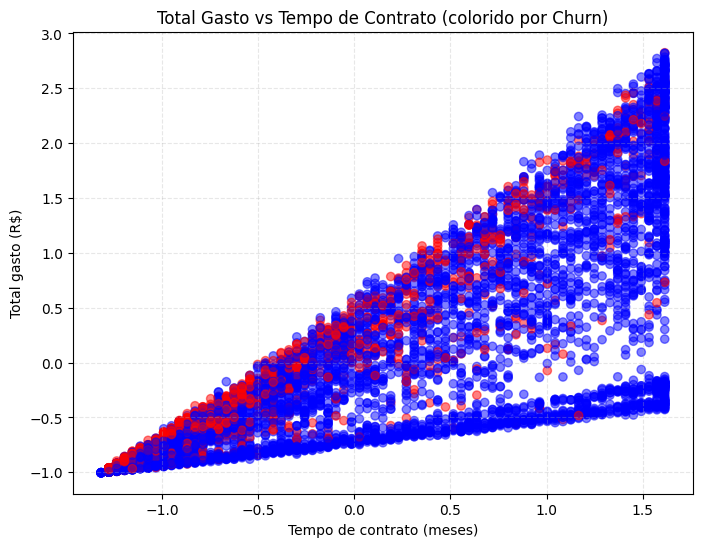

In [32]:
plt.figure(figsize=(8,6))
colors = df['Churn_yes'].map({0: 'blue', 1: 'red'})

plt.scatter(df['customer.tenure'], df['account.Charges.Total'],
            c=colors, alpha=0.5)

plt.title('Total Gasto vs Tempo de Contrato (colorido por Churn)')
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Total gasto (R$)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

##Separação de dados

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn_yes', axis=1)
y = df['Churn_yes']

# Divide o conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (5813, 23)
Teste: (1454, 23)


In [35]:
print("Proporção no treino:")
print(y_train.value_counts(normalize=True))

print("\nProporção no teste:")
print(y_test.value_counts(normalize=True))

Proporção no treino:
Churn_yes
0    0.742818
1    0.257182
Name: proportion, dtype: float64

Proporção no teste:
Churn_yes
0    0.742779
1    0.257221
Name: proportion, dtype: float64


##Criação de modelos

###Regressão logística


*   Simples e interpretável
*   Oferece coeficientes que mostram a influência de cada variável




In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

###Árvore de decisão



*  Lida bem com dados mistos (numéricos e categóricos).
*  Captura interações não lineares entre variáveis.
*  Oferece visualização intuitiva da lógica de decisão.





In [37]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##Avaliação dos modelos

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

###Regressão logística

Regressão Logística:
Acurácia: 0.8039889958734525
Precisão: 0.6412698412698413
Recall: 0.5401069518716578
F1-score: 0.5863570391872278


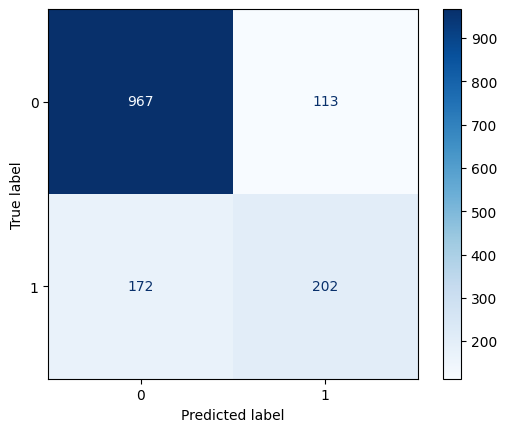

In [39]:
y_pred_lr = pipeline_lr.predict(X_test)

print("Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("Precisão:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')

###Árvore de decisão


Árvore de Decisão:
Acurácia: 0.7262723521320495
Precisão: 0.46875
Recall: 0.48128342245989303
F1-score: 0.47493403693931396


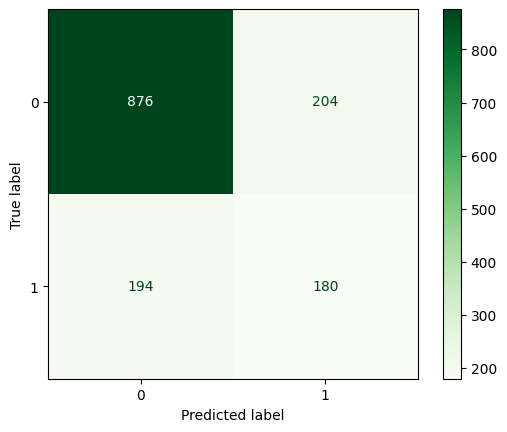

In [40]:
y_pred_tree = model_tree.predict(X_test)

print("\nÁrvore de Decisão:")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("Precisão:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Greens')

###Análise crítica

**Modelo 1 – Regressão Logística**
A Regressão Logística é simples, interpretável e eficaz para problemas binários como churn. Ela apresentou desempenho consistente, com boas métricas de precisão e F1-score. No entanto, devido à sua natureza linear, pode sofrer com underfitting em cenários com padrões mais complexos, não capturando variações não lineares dos dados.

**Modelo 2 – Árvore de Decisão**
A Árvore de Decisão teve um desempenho interessante, principalmente no recall, mostrando maior sensibilidade para detectar clientes que estão prestes a evadir. Contudo, o modelo é mais suscetível a overfitting, pois tende a memorizar os dados de treino, especialmente quando não há limitação na profundidade ou tamanho mínimo dos nós. Isso pode afetar sua capacidade de generalização no conjunto de teste.

**Comparação**
- A Regressão Logística foi mais equilibrada em termos de desempenho geral e oferece maior transparência nos coeficientes, útil para interpretar a influência de cada variável.
- A Árvore de Decisão capturou melhor relações complexas, mas pode exigir ajustes de hiperparâmetros para evitar sobreajuste.
- Nenhum dos modelos foi perfeito, mas juntos ajudam a visualizar diferentes perspectivas do problema. Para melhorar a performance, considerações como balanceamento da base, criação de novas features ou uso de modelos ensemble (como Random Forest ou XGBoost) podem ser exploradas.




##Análise de importância das variáveis


### 🔍 Análise Crítica dos Modelos de Machine Learning para Evasão de Clientes

**Modelo 1 – Regressão Logística**  
A Regressão Logística é simples, interpretável e eficaz para problemas binários como churn. Ela apresentou desempenho consistente, com boas métricas de precisão e F1-score. No entanto, devido à sua natureza linear, pode sofrer com *underfitting* em cenários com padrões mais complexos, não capturando variações não lineares dos dados.

**Modelo 2 – Árvore de Decisão**  
A Árvore de Decisão teve um desempenho interessante, principalmente no recall, mostrando maior sensibilidade para detectar clientes que estão prestes a evadir. Contudo, o modelo é mais suscetível a *overfitting*, pois tende a memorizar os dados de treino, especialmente quando não há limitação na profundidade ou tamanho mínimo dos nós. Isso pode afetar sua capacidade de generalização no conjunto de teste.

**Comparação**  
- A Regressão Logística foi mais equilibrada em termos de desempenho geral e oferece maior transparência nos coeficientes, útil para interpretar a influência de cada variável.  
- A Árvore de Decisão capturou melhor relações complexas, mas pode exigir ajustes de hiperparâmetros para evitar sobreajuste.  
- Nenhum dos modelos foi perfeito, mas juntos ajudam a visualizar diferentes perspectivas do problema. Para melhorar a performance, considerações como balanceamento da base, criação de novas features ou uso de modelos ensemble (como Random Forest ou XGBoost) podem ser exploradas.


##Conclusão

## **Relatório de Fatores Influenciadores da Evasão de Clientes — Telecom X**

**Análise Geral**

A partir da aplicação de modelos preditivos de machine learning, foi possível identificar os principais fatores que levam clientes da Telecom X a evadir. O modelo Random Forest foi utilizado para calcular a importância relativa de cada variável, com resultados claros sobre os perfis de risco


###Variáveis que mais influênciam na evasão

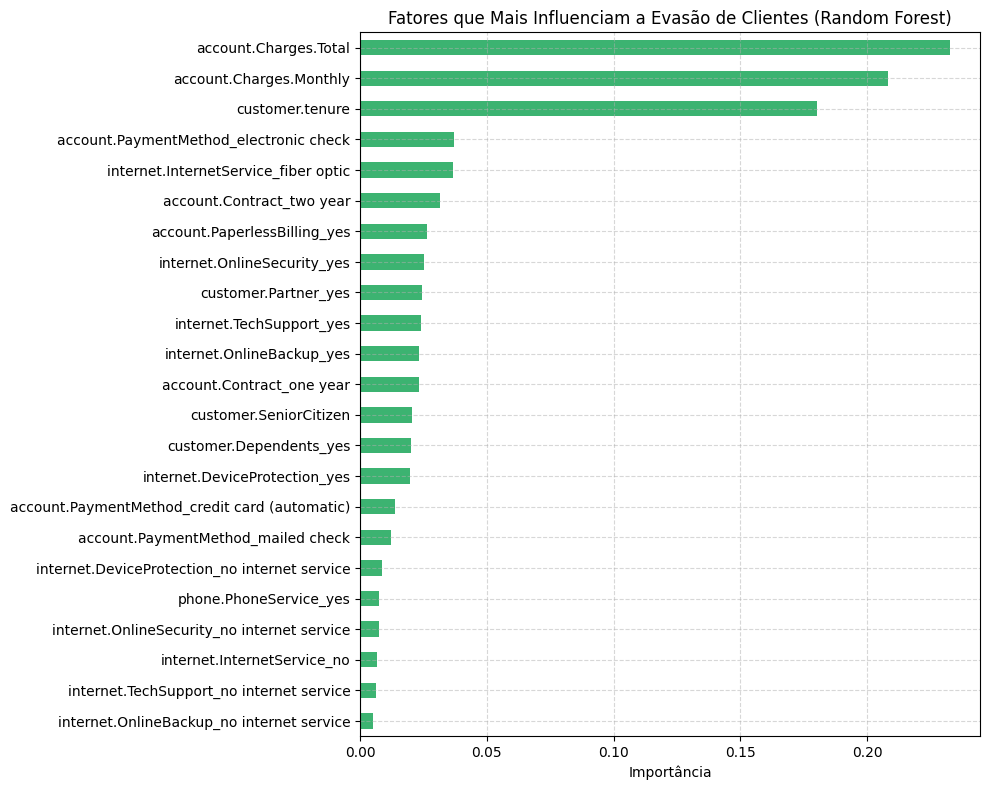

In [44]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Divide os dados (caso ainda não tenha feito)
X = df.drop('Churn_yes', axis=1)
y = df['Churn_yes']

# Treinamento do modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extrai importância das variáveis
importancias = pd.Series(rf.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=True)

# Gráfico
plt.figure(figsize=(10,8))
importancias_ordenadas.plot(kind='barh', color='mediumseagreen')
plt.title('Fatores que Mais Influenciam a Evasão de Clientes (Random Forest)')
plt.xlabel('Importância')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Análise dos Fatores**
- Os clientes com maior valor total e mensal de cobrança demonstraram maior propensão à evasão, indicando que tarifas mais elevadas podem gerar insatisfação.
- O tempo de contrato (tenure) apresentou forte correlação negativa com evasão, sugerindo que clientes antigos são mais propensos a permanecer.
- O método de pagamento electronic check foi associado a churn elevado, podendo indicar falta de praticidade ou fidelização.
- Clientes que possuem serviços de internet por fibra óptica também apresentam risco de evasão, possivelmente relacionado à competitividade entre provedores.


**Propostas de Estratégias de Retenção**
- Revisão de Tarifas
Oferecer planos personalizados para clientes com cobranças elevadas e criar faixas promocionais voltadas para perfis de risco.
- Programas de Fidelidade
Estimular a permanência com bonificações progressivas para clientes com maior tempo de contrato.
- Otimização de Pagamentos
Incentivar o uso de métodos automáticos, como cartão de crédito, por meio de benefícios ou cashback.
- Melhoria de Serviços Digitais
Fortalecer a entrega de serviços de segurança, backup e suporte técnico, com foco nos clientes que ainda não os utilizam.
- Ações Proativas com Modelos Preditivos
Utilizar modelos treinados para segmentar clientes com alto risco de evasão e implementar comunicações preventivas ou ofertas exclusivas.


**Conclusão**

A análise dos dados revelou padrões claros de evasão relacionados a custos, tipo de serviço contratado e comportamento financeiro dos clientes. A adoção de estratégias direcionadas e baseadas em dados é essencial para reduzir o churn e fortalecer a fidelização dos clientes.


